# Importing all necessary libraries

In [1]:
# For reading our dataset
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# For warnings
import warnings
warnings.filterwarnings(action='ignore')

# Importing necessary packages for building and tuning our model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling
from sklearn.model_selection import train_test_split
#from tensorflow import keras
#from keras import layers # type: ignore
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # type: ignore
#from keras_tuner.tuners import RandomSearch

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:


# Accessing the dataset
dataset_path = "loan.csv"

In [3]:
# Reading the dataset
df_read=pd.read_csv(dataset_path,low_memory=False)    # Setting low_memory=False to avoid DtypeWarning for columns with mixed data types
print("Shape of the dataset:",df_read.shape)
df_read.head()

Shape of the dataset: (887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

## Data Cleaning

In [5]:
# Calculate the percentage of missing values in df_read
percentage_missing = df_read.isnull().sum() / len(df_read) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df_read.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.799326,5.051393,0.0,0.000451,0.0,0.0,0.0,0.0,0.0,85.797951,0.0,0.017242,0.0,0.0,0.0,0.003268,0.003268,0.003268,51.197065,84.555303,0.003268,0.003268,0.0,0.056571,0.003268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.990018,0.0,28.507661,0.005973,0.01634,75.015974,0.0,0.0,99.942415,99.94264,99.942415,0.003268,7.919502,7.919502,97.591559,97.591559,97.591559,97.591559,97.654892,97.591559,97.902024,97.591559,97.591559,97.591559,97.591559,7.919502,97.591559,97.591559,97.591559


In [6]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df_read.columns[((df_read.isnull().sum()/len(df_read))*100 < 20)].to_list()
print("Total features before:",len(df_read.columns))
print("Total features now:",len(features_to_keep))

Total features before: 74
Total features now: 52


In [7]:
df1=df_read[features_to_keep]
df1.shape

(887379, 52)

In [8]:
lucky_features=['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc',
                'pub_rec','revol_bal','revol_util','total_acc','last_pymnt_amnt','loan_status']
print(len(lucky_features))

21


#####  So now that we have chosen our features let's proceed to describe each one of them
### **Loan Dataset Columns**
#### **Loan Information**
- **loan_amnt**: Số tiền của khoản vay
- **term**: Thời hạn của khoản vay (36 hoặc 60 tháng)
- **int_rate**: Lãi suất của khoản vay
- **installment**:  Số tiền trả hàng tháng của khoản vay

#### **Borrower Information**
- **grade**: Hạng được gán bởi LendingClub dựa trên khả năng tín dụng của người vay
- **sub_grade**: Một hạng chi tiết hơn dựa trên khả năng tín dụng của người vay
- **emp_length**:  Thời gian làm việc của người vay
- **home_ownership**: Loại sở hữu nhà của người vay
- **annual_inc**: Thu nhập hàng năm của người vay
- **verification_status**: Cho biết liệu thu nhập đã được xác minh bởi LendingClub hay không
#### **Loan Details**
- **purpose**: Mục đích của khoản vay
- **dti**: Tỷ lệ nợ trên thu nhập của người vay
- **delinq_2yrs**: Số lần trả nợ chậm trong 2 năm gần đây
- **inq_last_6mths**: Số lần kiểm tra thông tin trong 6 tháng gần đây
- **open_acc**:  Số dòng tín dụng mở trong tệp tín dụng của người vay
- **pub_rec**: Số bản ghi công cộng xấu
- **revol_bal**: Tổng số dư tín dụng quay vòng
- **revol_util**: Số tiền tín dụng mà người vay đang sử dụng so với tổng hạn mức tín dụng của họ
- **total_acc**: Tổng số dòng tín dụng trong tệp tín dụng của người vay
- **last_pymnt_amnt**: Số tiền trả cuối cùng nhận được

In [9]:
df=df1[lucky_features]
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (887379, 21)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,Fully Paid
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,Charged Off
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,Fully Paid
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,Fully Paid
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,67.79,Current


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   sub_grade            887379 non-null  object 
 6   emp_length           842554 non-null  object 
 7   home_ownership       887379 non-null  object 
 8   annual_inc           887375 non-null  float64
 9   verification_status  887379 non-null  object 
 10  purpose              887379 non-null  object 
 11  dti                  887379 non-null  float64
 12  delinq_2yrs          887350 non-null  float64
 13  inq_last_6mths       887350 non-null  float64
 14  open_acc             887350 non-null  float64
 15  pub_rec          

In [11]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt
count,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000
mean,14755.264605,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,25.268026,2164.145585
std,8435.455601,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,11.840561,4794.783233
min,500.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,280.170000
50%,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,462.780000
75%,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,32.000000,831.245000
max,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,36475.590000


Since 'loan_status' is the target variavle therefore it is important to explore this feature.

In [12]:
df_read['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

### As we can see there are so many labels in loan_status but i want my model to predict whether the loan was full paid or charged off. So <u>in my case</u> I am selecting only those samples that have loan status either full paid or charged off.

In [13]:
target_loan= ["Fully Paid","Charged Off"]
df=df[df["loan_status"].isin(target_loan)]
print(df.shape)

(252971, 21)


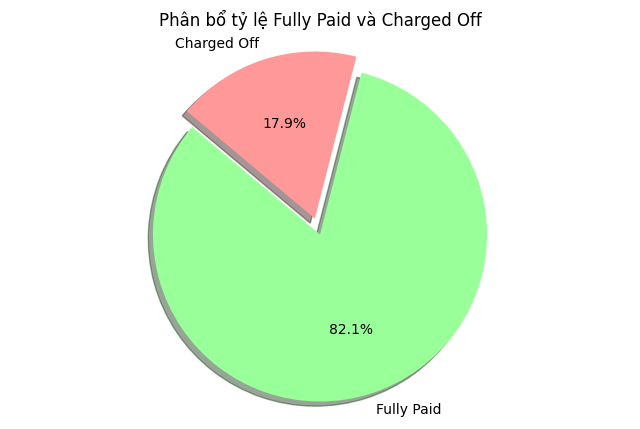

In [14]:
# Đếm số lượng của mỗi trạng thái
counts = df['loan_status'].value_counts()

# Tính phần trăm
fully_paid_percent = (counts['Fully Paid'] / len(df)) * 100
charged_off_percent = (counts['Charged Off'] / len(df)) * 100

# Vẽ biểu đồ
labels = ['Fully Paid', 'Charged Off']
sizes = [fully_paid_percent, charged_off_percent]
colors = ['#99ff99', '#ff9999']
explode = (0.1, 0)  # Để tách biệt cột Fully Paid

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Phân bổ tỷ lệ Fully Paid và Charged Off')
plt.axis('equal')  # Giữ cho biểu đồ tròn
plt.show()



#### --> 'loan_status' column's labels information:

- Fully Paid: Khoản vay đã được thanh toán đầy đủ bởi người vay.
- Charged Off: Khoản vay không được thanh toán đầy đủ và Lending Club đã khấu trừ số dư còn lại như một khoản lỗ.
- Current: Khoản vay hiện đang được thanh toán đúng lịch trình.
- Default: Người vay đã không thực hiện thanh toán trên khoản vay và khoản vay đang ở trạng thái mặc định.
- Late (31-120 days):  Người vay đã bỏ lỡ thanh toán và đang nợ 31 đến 120 ngày so với lịch trình thanh toán của họ.
- In Grace Period: Người vay đang ở trong giai đoạn khoan hồng và đã bỏ lỡ một khoản thanh toán.
- Late (16-30 days):  Người vay đã bỏ lỡ một khoản thanh toán và đang nợ 16 đến 30 ngày so với lịch trình thanh toán của họ..
-Status:Fully Paid: Khoản vay đã được thanh toán đầy đủ, nhưng không đáp ứng được chính sách tín dụng của Lending Club.
-  Status:Charged Off: Khoản vay không đáp ứng được chính sách tín dụng của Lending Club và đã được khấu trừ như một khoản lỗ.
- Issued: TKhoản vay đã được cấp nhưng chưa được các nhà đầu tư tài trợ.

## Explorarotry Data Analysis

In [15]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             9897
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              199
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

### Handling null values

In [16]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

### Visualization

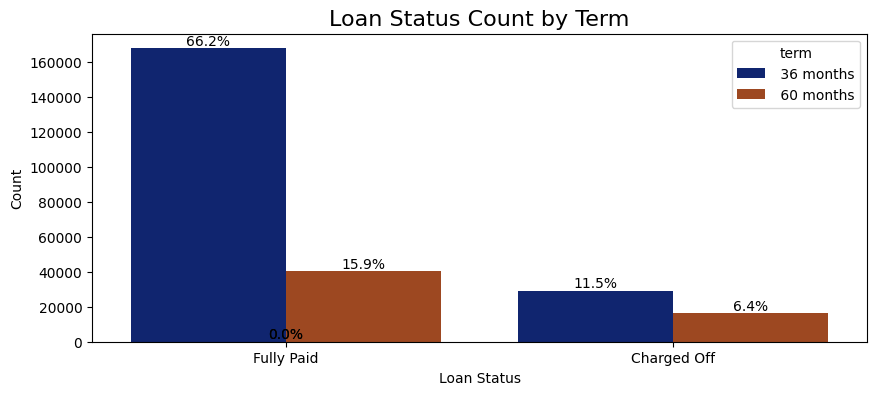

In [17]:
# Tạo biểu đồ countplot với Seaborn
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(data=df, x="loan_status", hue="term", palette='dark', ax=ax)

# Tính số lượng từng nhóm
total = len(df)

# Thêm phần trăm trên đỉnh của từng cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Thiết lập các nhãn và tiêu đề
ax.set(xlabel='Loan Status', ylabel='Count')
ax.set_title('Loan Status Count by Term', size=16)

plt.show()

Text(0.5, 1.0, 'Loan status count')

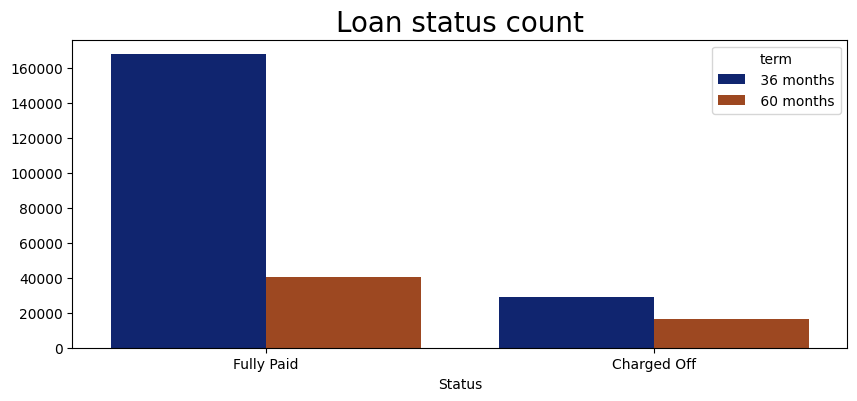

In [18]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="term",palette='dark')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

Text(0.5, 1.0, 'Loan status count')

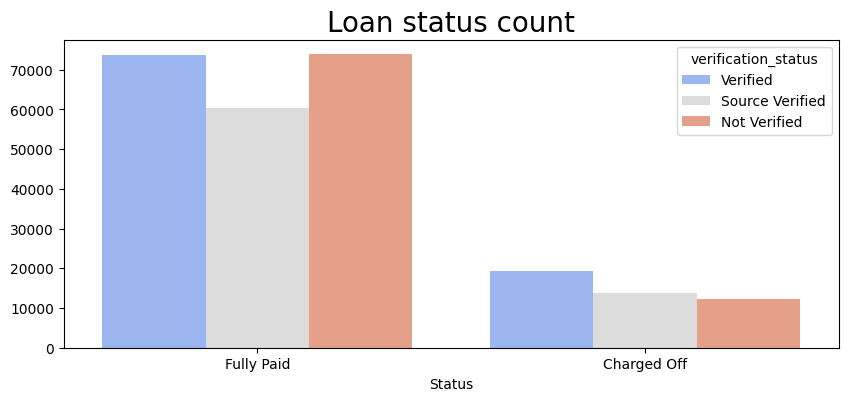

In [19]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="verification_status",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

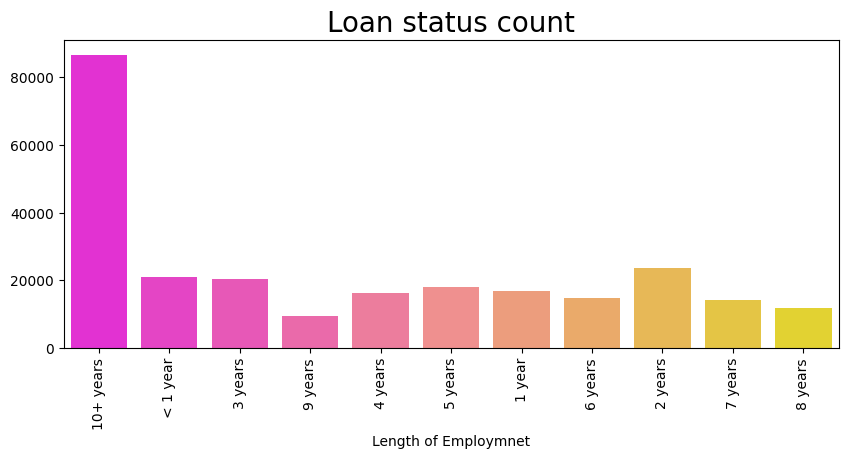

In [20]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="emp_length",palette='spring')
ax.set(xlabel='Length of Employmnet', ylabel='')
ax.set_title('Loan status count', size=20)
plt.xticks(rotation='vertical')
plt.show()

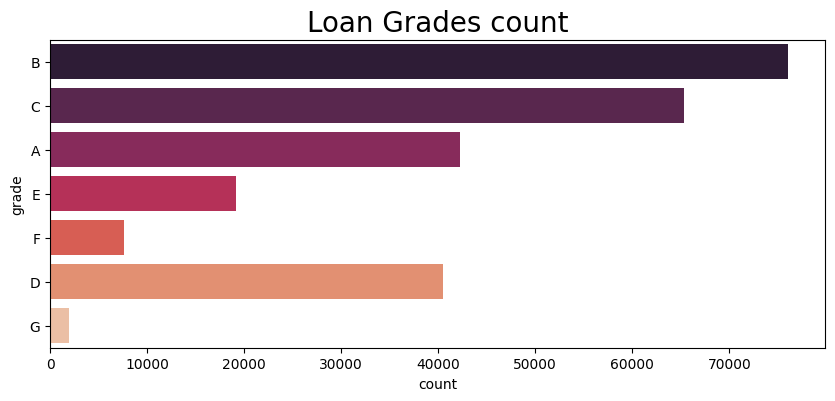

In [21]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,y="grade",palette='rocket')
ax.set_title('Loan Grades count', size=20)
plt.show()

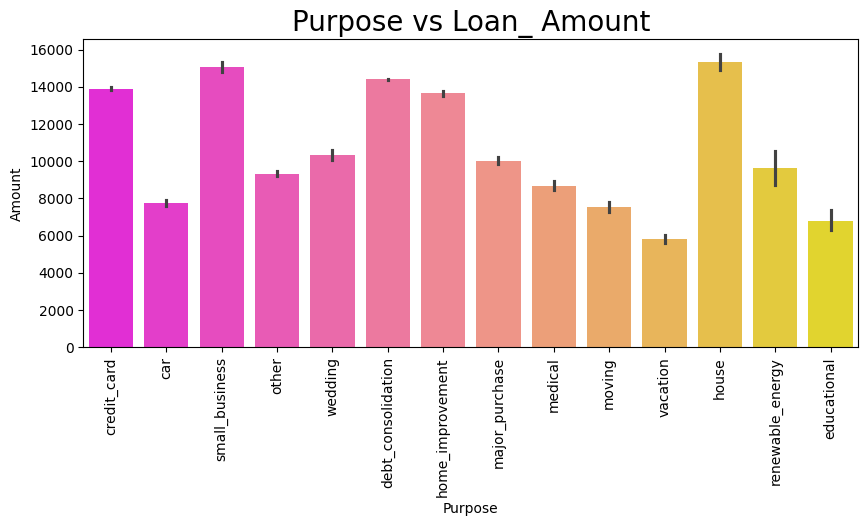

In [22]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

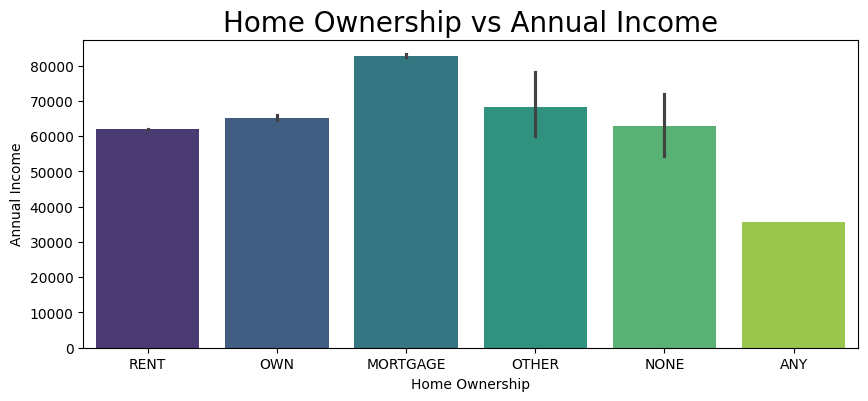

In [23]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

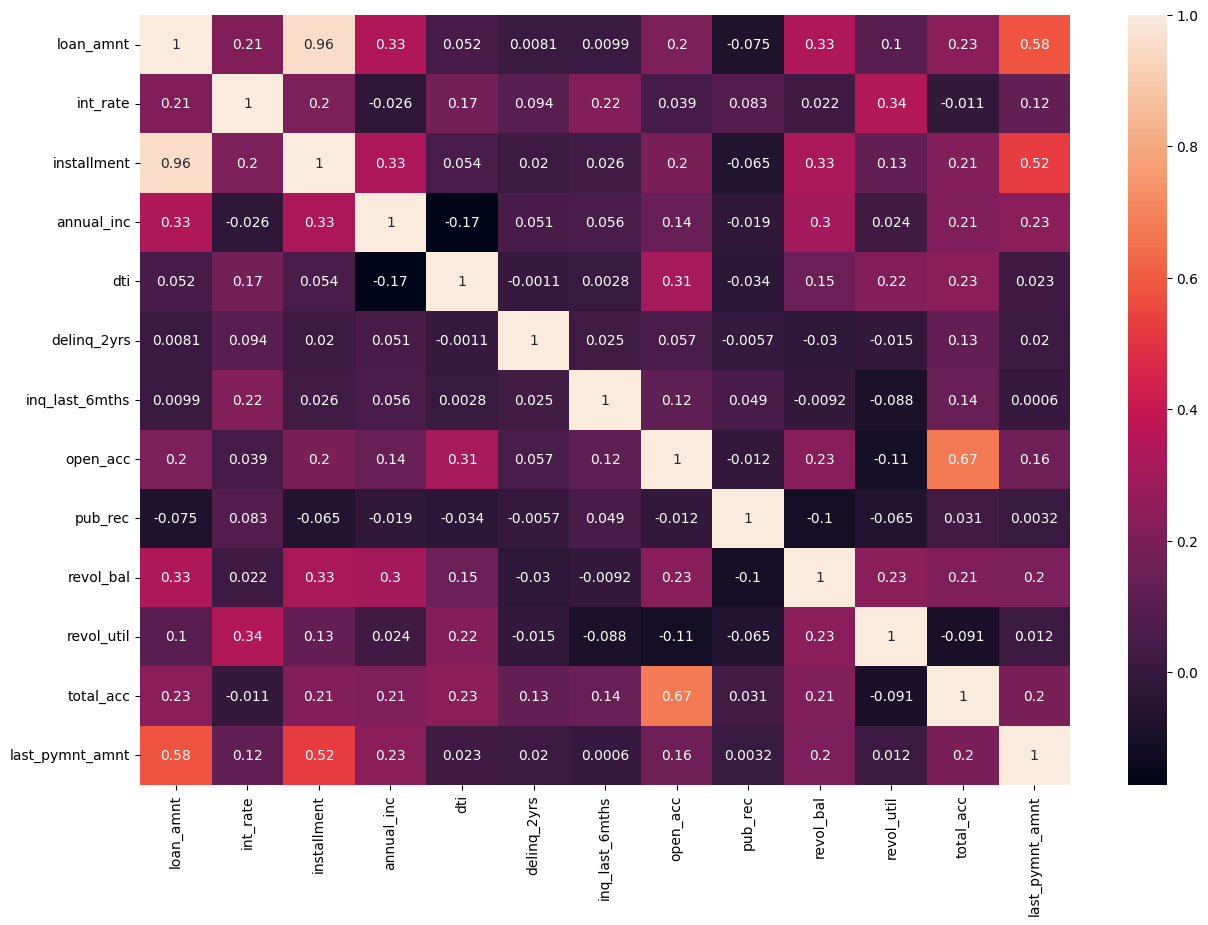

In [24]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[int, float])

# Calculate correlation
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
# Dividing our features into categorical and numerical
categorical=[feature for feature in df.columns if df[feature].dtype=='object']
numerical=[feature for feature in df.columns if feature not in categorical]

In [26]:
print("Categorical columns:",categorical)
print("Numerical columns:",numerical)

Categorical columns: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'loan_status']
Numerical columns: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt']


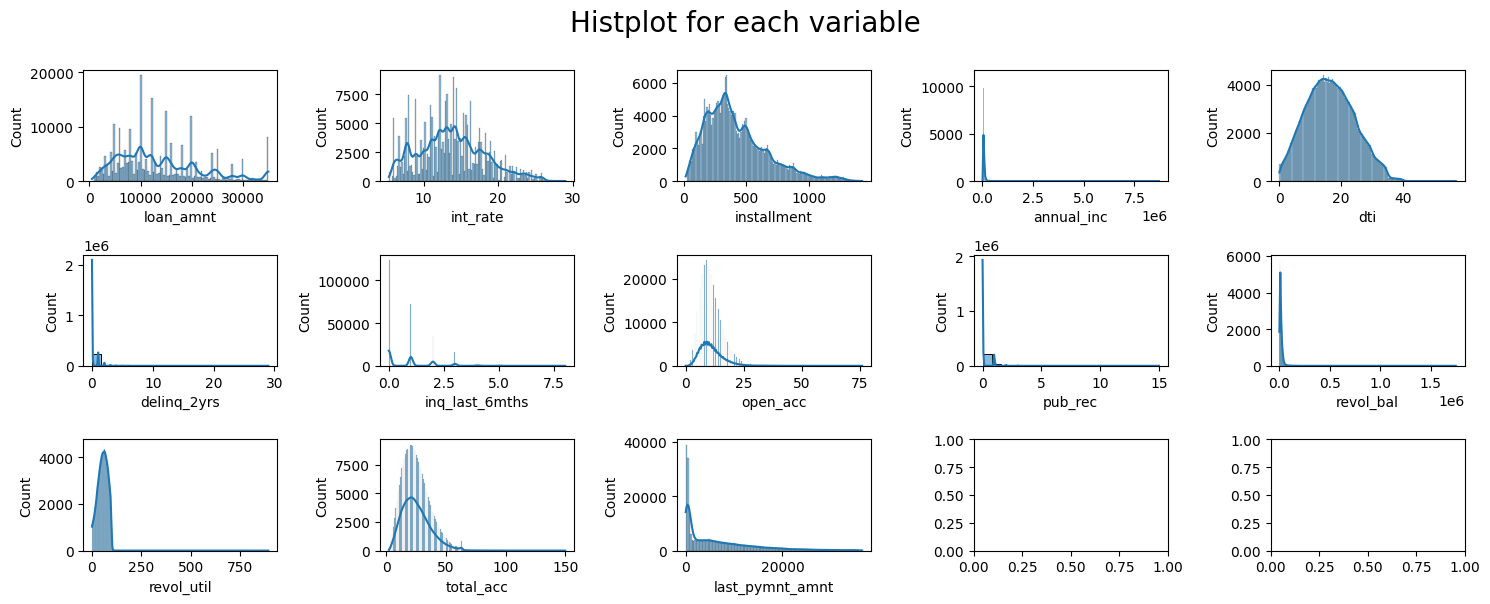

In [27]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical)
plt.tight_layout()

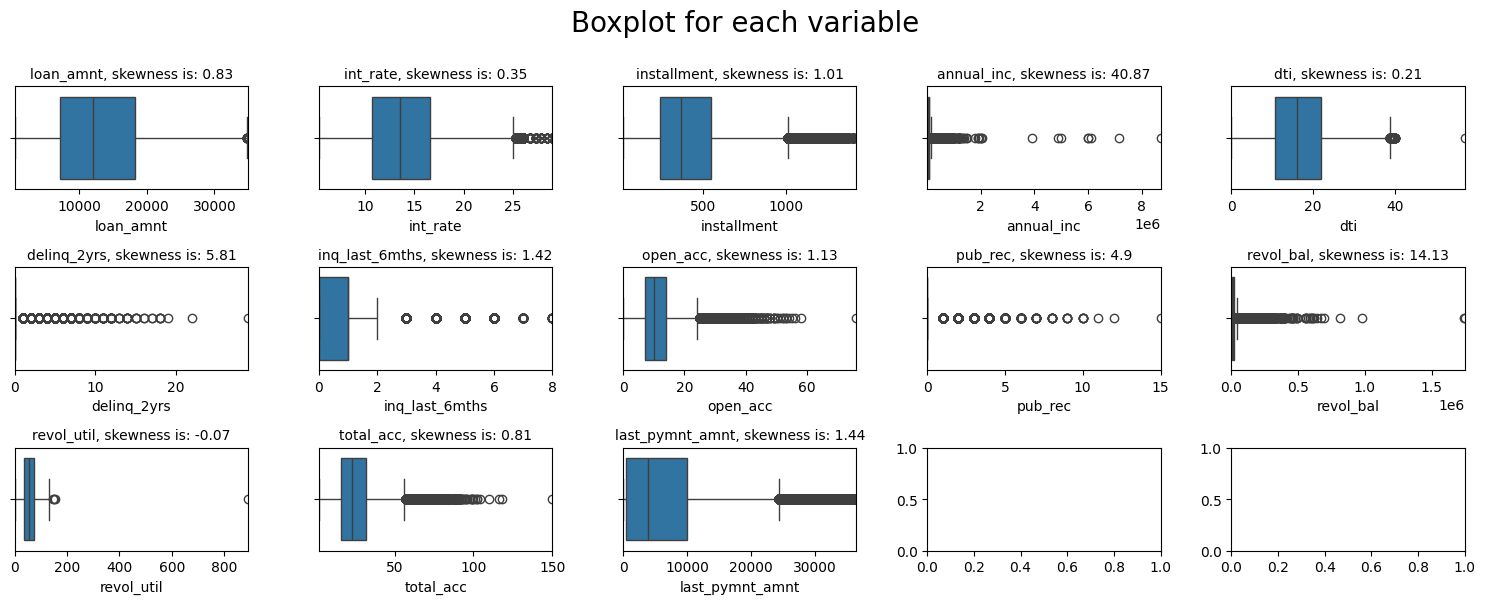

In [28]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

### Preprocessing

In [29]:
# Term column
print("Before:",df['term'].unique())
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",df['term'].unique())
df['term']=df['term'].astype('int64')

Before: [' 36 months' ' 60 months']
After: ['36' '60']


In [30]:
# In ra các giá trị unique trước khi thay đổi
print("Before:", df['emp_length'].unique())

# Thực hiện thay đổi
df['emp_length'] = df['emp_length'].str.replace('\s+', '', regex=True)

# In ra các giá trị unique sau khi thay đổi
print("After:", df['emp_length'].unique())


Before: ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']
After: ['10+years' '<1year' '3years' '9years' '4years' '5years' '1year' '6years'
 '2years' '7years' '8years']


In [31]:
# In ra các giá trị unique trước khi thay đổi
print("Before:", df['emp_length'].unique())

# Thực hiện thay đổi
df['emp_length'] = df['emp_length'].str.replace('s', '')

# In ra các giá trị unique sau khi thay đổi
print("After:", df['emp_length'].unique())

Before: ['10+years' '<1year' '3years' '9years' '4years' '5years' '1year' '6years'
 '2years' '7years' '8years']
After: ['10+year' '<1year' '3year' '9year' '4year' '5year' '1year' '6year'
 '2year' '7year' '8year']


In [32]:
# In ra các giá trị unique trước khi thay đổi
print("Before:", df['emp_length'].unique())

# Thực hiện thay đổi
df['emp_length'] = df['emp_length'].str.replace('year', '').str.strip()

# In ra các giá trị unique sau khi thay đổi
print("After:", df['emp_length'].unique())


Before: ['10+year' '<1year' '3year' '9year' '4year' '5year' '1year' '6year'
 '2year' '7year' '8year']
After: ['10+' '<1' '3' '9' '4' '5' '1' '6' '2' '7' '8']


In [33]:
# Creating a pickle file for the TfidfVectorizer
with open('dataset.pkl', 'wb') as f:
    pickle.dump(df, f)

In [34]:
import joblib

# Assuming 'df' is your dataset and has already been defined
joblib.dump(df, 'dataset.joblib')


['dataset.joblib']

In [35]:
# Label Encoding
df['grade']= df['grade'].map({'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

df['sub_grade']= df['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 
                                      'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 
                                      'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 
                                      'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 
                                      'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 
                                      'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 
                                      'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})

df['emp_length']= df['emp_length'].map({'<1': 0,'1': 1,'2': 2,'3': 3,
                                        '4': 4, '5': 5,'6': 6,'7': 7,
                                        '8': 8,'9': 9, '10+': 10})

    df['loan_status']= df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [36]:
# One hot encoding
df=pd.get_dummies(data=df,columns=['home_ownership','verification_status','purpose'],drop_first=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,1,6,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,0,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2500.0,60,15.27,59.83,2,13,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2400.0,36,15.96,84.33,2,14,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,10000.0,36,13.49,339.31,2,10,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,5000.0,36,7.90,156.46,0,3,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [37]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,36,10.65,162.87,1,6,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,171.62,0,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2500.0,60,15.27,59.83,2,13,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,119.66,1,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2400.0,36,15.96,84.33,2,14,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,649.91,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,10000.0,36,13.49,339.31,2,10,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,357.48,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,5000.0,36,7.90,156.46,0,3,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,161.03,0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Model Training

In [38]:
# Dividing our dataset into independent and dependent features
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [39]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [40]:
model00=RandomForestClassifier()
model00.fit(X_train,y_train)


RandomForestClassifier()

In [41]:
y_pred=model00.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[50038  1977]
 [ 3398  7830]]


Accuracy Score: 
 0.915010356877441


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     52015
           1       0.80      0.70      0.74     11228

    accuracy                           0.92     63243
   macro avg       0.87      0.83      0.85     63243
weighted avg       0.91      0.92      0.91     63243



In [42]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model01=RandomForestClassifier()
model01.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=model01.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[49995  2020]
 [ 3361  7867]]


Accuracy Score: 
 0.9149154847176763


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     52015
           1       0.80      0.70      0.75     11228

    accuracy                           0.91     63243
   macro avg       0.87      0.83      0.85     63243
weighted avg       0.91      0.91      0.91     63243



In [45]:
df['loan_status'].value_counts()

loan_status
0    207723
1     45248
Name: count, dtype: int64

Let's look at the percentage of each category in our target column before model training.

In [46]:
print("Fully Paid:",df['loan_status'].value_counts()[0]/len(df['loan_status'])*100)
print("Charged Off:",df['loan_status'].value_counts()[1]/len(df['loan_status'])*100)

Fully Paid: 82.11336477303722
Charged Off: 17.886635226962774


It's time to apply some resampling techniques !!!

# Handling Imbalanced Dataset

## UnderSampling

In [47]:
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 155708, 1: 34020})
The number of classes after fit Counter({0: 34020, 1: 34020})


In [48]:
model1=RandomForestClassifier()
model1.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [49]:
y_pred=model1.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[37053 14962]
 [ 1415  9813]]


Accuracy Score: 
 0.7410464399222049


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     52015
           1       0.40      0.87      0.55     11228

    accuracy                           0.74     63243
   macro avg       0.68      0.79      0.68     63243
weighted avg       0.86      0.74      0.77     63243



## OverSampling

In [50]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 155708, 1: 34020})
The number of classes after fit Counter({0: 155708, 1: 155708})


In [51]:
model2=RandomForestClassifier()
model2.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [52]:
y_pred=model2.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[48808  3207]
 [ 2413  8815]]


Accuracy Score: 
 0.9111364103537151


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     52015
           1       0.73      0.79      0.76     11228

    accuracy                           0.91     63243
   macro avg       0.84      0.86      0.85     63243
weighted avg       0.91      0.91      0.91     63243



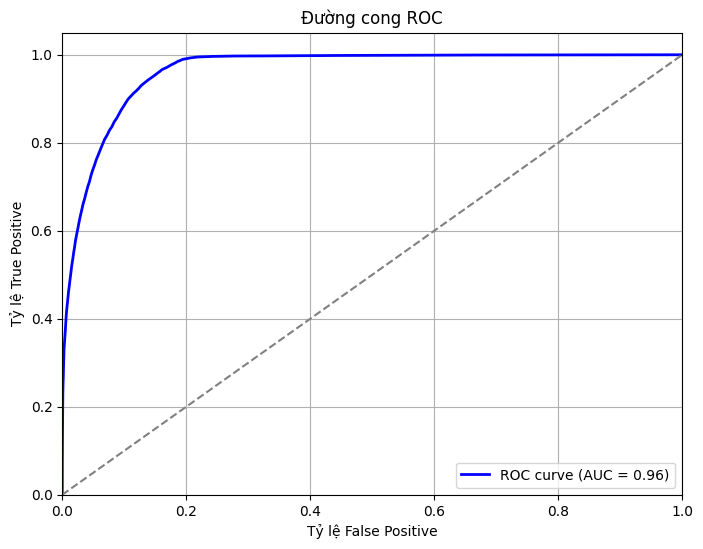

In [54]:
y_prob = model2.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## SMOTETomek(Do both undersampling and oversampling)

In [55]:
smt=SMOTETomek()
X_train_smt,y_train_smt=smt.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smt)))

The number of classes before fit Counter({0: 155708, 1: 34020})
The number of classes after fit Counter({0: 155128, 1: 155128})


In [56]:
model3=RandomForestClassifier()
model3.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [57]:
y_pred=model3.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[48080  3935]
 [ 2102  9126]]


Accuracy Score: 
 0.9045427952500672


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     52015
           1       0.70      0.81      0.75     11228

    accuracy                           0.90     63243
   macro avg       0.83      0.87      0.85     63243
weighted avg       0.91      0.90      0.91     63243



DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_os,y_train_os)

DecisionTreeClassifier()

In [59]:
y_pred=model4.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[48864  3151]
 [ 3321  7907]]


Accuracy Score: 
 0.8976645636671252


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     52015
           1       0.72      0.70      0.71     11228

    accuracy                           0.90     63243
   macro avg       0.83      0.82      0.82     63243
weighted avg       0.90      0.90      0.90     63243



In [53]:
from sklearn.metrics import roc_curve, auc

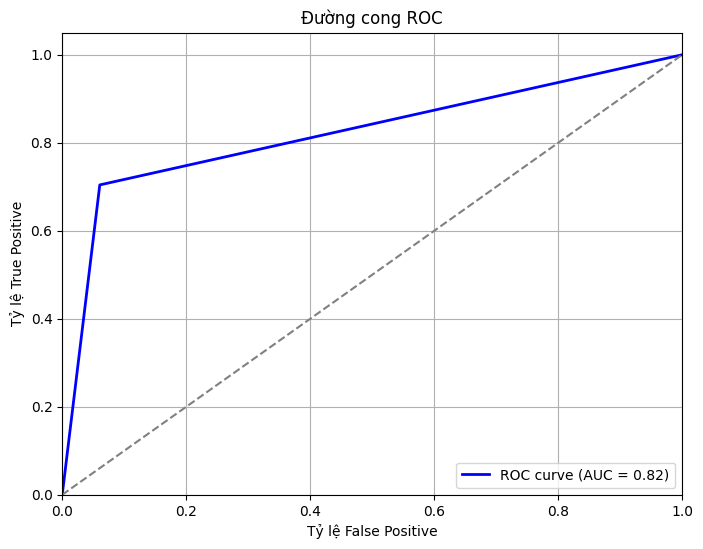

In [60]:
y_prob = model4.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
model5 = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện oversampled
model5.fit(X_train_os, y_train_os)


LogisticRegression()

In [62]:
y_pred=model5.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[42633  9382]
 [  360 10868]]


Accuracy Score: 
 0.8459592365953544


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     52015
           1       0.54      0.97      0.69     11228

    accuracy                           0.85     63243
   macro avg       0.76      0.89      0.79     63243
weighted avg       0.91      0.85      0.86     63243



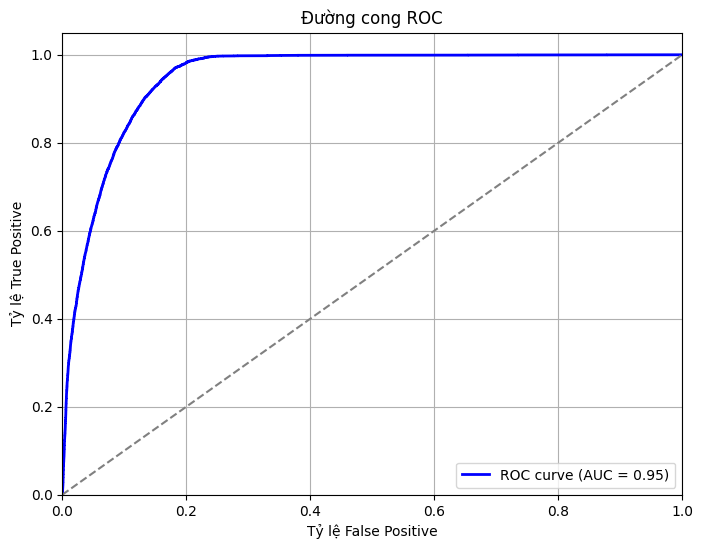

In [63]:
y_prob = model5.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình RandomForestClassifier
model_rf = RandomForestClassifier()

# Định nghĩa lưới các tham số cần tinh chỉnh với các giá trị thấp hơn
param_grid = {
    'n_estimators': [50, 100, 150],    # Số lượng cây trong rừng
    'max_depth': [5, 10, 15],          # Độ sâu tối đa của các cây
    'min_samples_split': [2, 3, 4],    # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 3]      # Số lượng mẫu tối thiểu tại lá
}

# Tạo một đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Tiến hành tìm kiếm các tham số tối ưu
grid_search.fit(X_train_os, y_train_os)

# In ra các tham số tối ưu và điểm số tốt nhất
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Best accuracy found:  0.9249364214300312


In [64]:
best_params = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}

model_rf = RandomForestClassifier(**best_params, random_state=42)
model_rf.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=150,
                       random_state=42)

In [65]:
y_pred=model_rf.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[44604  7411]
 [  649 10579]]


Accuracy Score: 
 0.8725550653827301


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     52015
           1       0.59      0.94      0.72     11228

    accuracy                           0.87     63243
   macro avg       0.79      0.90      0.82     63243
weighted avg       0.92      0.87      0.88     63243



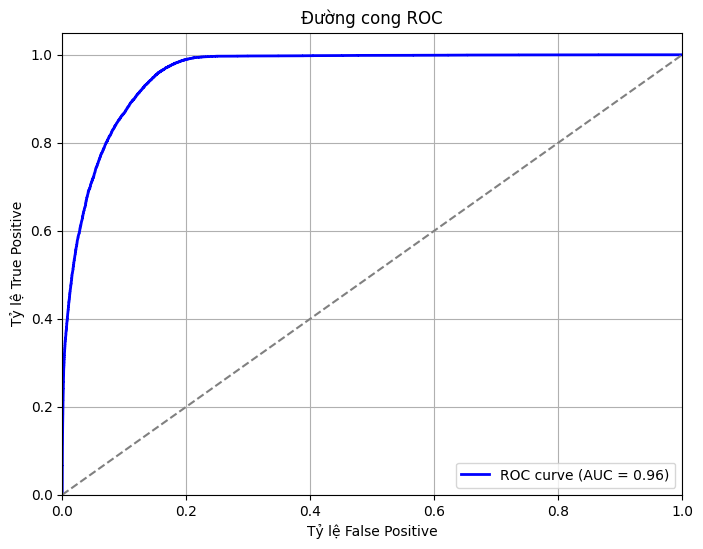

In [66]:
y_prob = model_rf.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

# Định nghĩa lưới các tham số cần tinh chỉnh
param_grid_dt = {
    'max_depth': [5, 10, 15],          # Độ sâu tối đa của cây
    'min_samples_split': [2, 3, 4],    # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 3]      # Số lượng mẫu tối thiểu tại lá
}

# Tạo một đối tượng GridSearchCV cho DecisionTreeClassifier
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)

# Tiến hành tìm kiếm các tham số tối ưu cho DecisionTreeClassifier
grid_search_dt.fit(X_train_os, y_train_os)

# In ra các tham số tối ưu và điểm số tốt nhất cho DecisionTreeClassifier
print("Decision Tree Best parameters found: ", grid_search_dt.best_params_)
print("Decision Tree Best accuracy found: ", grid_search_dt.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Decision Tree Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best accuracy found:  0.9229198183970978


In [67]:
best_params = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
model_dt = DecisionTreeClassifier(**best_params, random_state=42)
model_dt.fit(X_train_os, y_train_os)


DecisionTreeClassifier(max_depth=15, random_state=42)

In [68]:
y_pred=model_dt.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[44904  7111]
 [  866 10362]]


Accuracy Score: 
 0.8738674635928086


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     52015
           1       0.59      0.92      0.72     11228

    accuracy                           0.87     63243
   macro avg       0.79      0.89      0.82     63243
weighted avg       0.91      0.87      0.88     63243



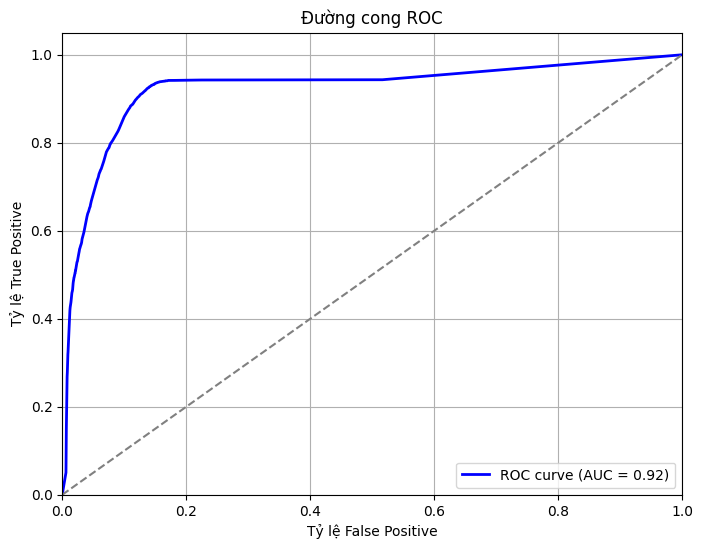

In [69]:
y_prob = model_dt.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình LogisticRegression
model_lr = LogisticRegression()

# Định nghĩa lưới các tham số cần tinh chỉnh
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Loại regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Siêu tham số C của regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Thuật toán tối ưu
    'max_iter': [100, 200, 300]                    # Số lần lặp tối đa
}

# Tạo một đối tượng GridSearchCV cho LogisticRegression
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)

# Tiến hành tìm kiếm các tham số tối ưu cho LogisticRegression
grid_search_lr.fit(X_train_os, y_train_os)

# In ra các tham số tối ưu và điểm số tốt nhất cho LogisticRegression
print("Logistic Regression Best parameters found: ", grid_search_lr.best_params_)
print("Logistic Regression Best accuracy found: ", grid_search_lr.best_score_)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
Logistic Regression Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Best accuracy found:  0.8943888579796532


In [71]:
# Các tham số tốt nhất đã tìm được
best_params = {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

# Khởi tạo mô hình Logistic Regression với các tham số này
model_lr = LogisticRegression(**best_params, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
model_lr.fit(X_train_os, y_train_os)


LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [72]:
y_pred=model_lr.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Confusion Matrix: 
 [[42739  9276]
 [  360 10868]]


Accuracy Score: 
 0.8476353114178644


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     52015
           1       0.54      0.97      0.69     11228

    accuracy                           0.85     63243
   macro avg       0.77      0.89      0.80     63243
weighted avg       0.91      0.85      0.86     63243



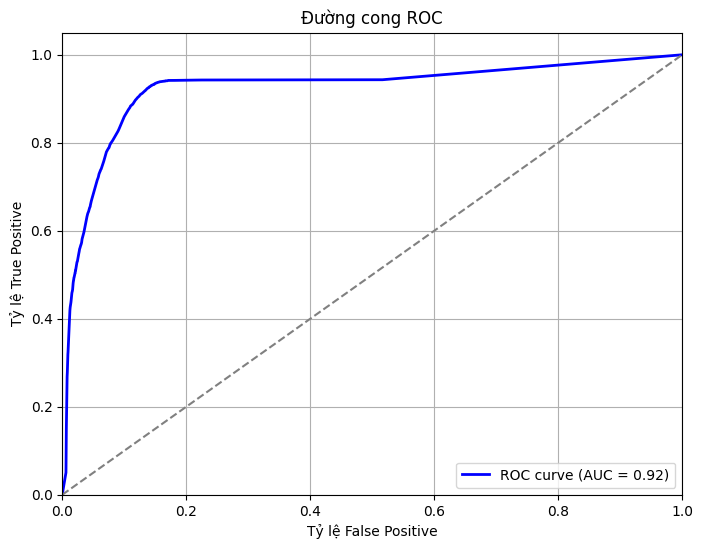

In [73]:
y_prob = model_dt.predict_proba(X_test)[:, 1]  # Dự báo xác suất lớp positive cho tập dữ liệu kiểm tra

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ False Positive')
plt.ylabel('Tỷ lệ True Positive')
plt.title('Đường cong ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [78]:
best_params = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}

model_rf = RandomForestClassifier(**best_params, random_state=42)
model_rf.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=150,
                       random_state=42)

In [79]:
filename = 'rf0.joblib'
joblib.dump(model_rf, filename)

# Tải mô hình
loaded_model = joblib.load(filename)

In [80]:
filename = 'rf1.joblib'
joblib.dump(model2, filename)
# Tải mô hình
loaded_model = joblib.load(filename)

In [76]:
import joblib

# Lưu mô hình vào file
filename = 'rf.joblib'
joblib.dump(model_rf, filename)


['random_forest_model.joblib']

In [77]:
# Đọc mô hình từ file
loaded_model = joblib.load(filename)

# Sử dụng mô hình đã nạp
y_pred = loaded_model.predict(X_test)
print(y_pred)


[0 1 1 ... 0 1 0]
